<a href="https://colab.research.google.com/github/victordaniel/Deeplearning/blob/master/PCB_Alexnet_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [1]:
%tensorflow_version 1.x
 

TensorFlow 1.x selected.


In [0]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential


In [3]:

from matplotlib import pyplot
%matplotlib inline
#from scipy.misc import toimage
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
#K.set_image_dim_ordering('tf')


Using TensorFlow backend.


In [4]:
%tensorflow_version

Currently selected TF version: 1.x
Available versions:
* 1.x
* 2.x


In [5]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
import os
print(os.getcwd())
print(os.chdir('/content/drive/My Drive/'))
print(os.listdir())

/content
None
['s_x_train (1).npy', 's_x_train.npy', 'pcb_aug.npy', 'pcb_aug_y.npy', 'Getting started.pdf', '2017-ieee-Anomaly-Detection-in-Online-Social-Network-A-Survey.pdf', '01565707.pdf', '6-oddball.pdf', 'A-comparative-analysis-of-structural-graph-metrics-t_2017_Computers---Electr.pdf', 'Anomaly detection in multiplex network.docx', 'Anomaly detection in multiplex network.pdf', 'anomaly detection in multiplex networks.html', 'anomaly detection in social networks.pdf', 'definitions.pdf', 'easy.pdf', 'eigen vector anomaly detection.pdf', 'evolving data survey.pdf', 'facebook.tar.gz', 'graph based kmeans clustering.pdf', 'graph similarity.pdf', 'Graph_Cluster_Analysis.pdf', 'GraphClustering_Schaeffer07.pdf', 'hadassah.pdf', 'imp.pdf', 'Graphtheory.pdf', 'image.png', 'M.Tech. DA Syllabus1.pdf', 'matrix factorization.pdf', 'Networks An introduction.pdf', 'New Text Document.txt', 'nguyen-phan-anh-bsc.pdf', 'Notes (1).docx', 'oddball_Technical report.pdf', 'phd thesis preliminary  work.

In [0]:
from IPython.display import Image,display
#display(Image(filename='/content/drive/My Drive/SSDL/Day2/Image/alex.png',embed=True))

In [8]:
import numpy as np
data_x=np.load('x_train.npy')
data_y=np.load('y_train.npy')
#print(len(data_x))
#print(len(data_y))
#train_x=data_x
#train_y=data_y
##print(train_x.shape)
#print(train_y.shape)
#print(np.unique(train_y))
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)
X_train,  y_train = data_x, data_y
#X_test=np.load('Copy of xtrain.npy')
#y_test=np.load('Copy of ytrain.npy')


print(X_train.shape)
print(y_train.shape)



(5040, 300, 300, 3)
(5040,)


In [0]:

X_test=np.load('Copy of xtrain.npy')
y_test=np.load('Copy of ytrain.npy')

In [11]:
""""
#X_train,  y_train = data_x, data_y
X_test=np.load('raw_x_train.npy')
y_test=np.load('raw_y_train.npy')
"""

'"\n#X_train,  y_train = data_x, data_y\nX_test=np.load(\'raw_x_train.npy\')\ny_test=np.load(\'raw_y_train.npy\')\n'

In [12]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

5040
5040
298
298


In [13]:
print(np.unique(y_test))

[0. 1.]


In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5040, 300, 300, 3)
(5040,)
(298, 300, 300, 3)
(298,)


**Pre-Processing**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
from keras.optimizers import adam
from keras import regularizers

**AlexNet Model**

In [18]:
"""
def AlexNet_model():

    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2))) 
     

    
    model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    
    model.add(Dense(num_classes, activation='sigmoid'))
    
    lrate = 0.0001
    epochs=20
    decay = lrate/epochs
    optimizer =adam(lr=0.0001)
    #sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model
  """

"\ndef AlexNet_model():\n\n    model = Sequential()\n    \n    model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3), activation='relu',padding='same'))\n    model.add(MaxPooling2D(pool_size=(2, 2)))\n    \n    \n    model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))\n    model.add(MaxPooling2D(pool_size=(2, 2)))\n    \n    model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))\n    model.add(MaxPooling2D(pool_size=(2, 2))) \n     \n\n    \n    model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))\n    model.add(MaxPooling2D(pool_size=(2, 2)))\n    \n    model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))\n    model.add(MaxPooling2D(pool_size=(2, 2)))\n    \n    model.add(Dropout(0.25))\n    model.add(Flatten())\n    \n    model.add(Dense(1024, activation='relu'))\n    model.add(Dense(512, activation='relu'))\n    \n    model.add(Dense(num_classes, activation='sigmoid'))\n    \n    lrate = 0.0001\n    epochs=20\n    decay = lrate/epochs\n 

In [0]:
def AlexNet_model():

    model = Sequential()
    
    model.add(Conv2D(96, (11, 11), strides=4,input_shape=(300, 300, 3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3),strides=2))


    model.add(Conv2D(256, (5, 5), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=2))
    
    
    model.add(Conv2D(384, (3,3), activation='relu',padding='same'))
    model.add(Conv2D(384, (3,3), activation='relu',padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=2))
       
    model.add(Dropout(0.50))
    model.add(Flatten())
    
    #model.add(Dense(9216, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.50))
    model.add(Dense(4096, activation='relu'))
    
    model.add(Dense(num_classes, activation='sigmoid'))
    
    lrate = 0.0001
    epochs=35
    decay = lrate/epochs
    optimizer =adam(lr=0.0001)
    #sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [0]:
#os.chdir('/content/drive/My Drive/Colab Notebooks/DL_Practical_MLP/Results/MLP_CIFAR10')
import keras
import keras.callbacks
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping,ModelCheckpoint
mc = ModelCheckpoint('PCB_ALEXNET.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
filepath = "saved-model-{epoch:02d}.h5"
mc1 = ModelCheckpoint(filepath, monitor='val_loss', mode='min', verbose=1, save_best_only=True  ,period=10)
cv = keras.callbacks.CSVLogger('PCB_ALEXNET.h5.csv', separator=',', append=False)
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=75,  mode='auto')


In [21]:

"""
import os
os.chdir("/content/drive/My Drive/PCB")
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger
mc = ModelCheckpoint('cipharAlexNetNet.h5', monitor='val_loss', save_best_only=True)
tb = TensorBoard(log_dir='/content/cnn/My Drive/logs', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq='epoch')
cv = CSVLogger('cipharAlexNetNet.csv',append=True)
"""

'\nimport os\nos.chdir("/content/drive/My Drive/PCB")\nfrom keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger\nmc = ModelCheckpoint(\'cipharAlexNetNet.h5\', monitor=\'val_loss\', save_best_only=True)\ntb = TensorBoard(log_dir=\'/content/cnn/My Drive/logs\', write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, update_freq=\'epoch\')\ncv = CSVLogger(\'cipharAlexNetNet.csv\',append=True)\n'

In [22]:
from keras.callbacks import ModelCheckpoint
"""
model = Sequential()
model.add(Dense(10, input_dim=784, kernel_initializer='uniform'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
"""
'''
saves the model weights after each epoch if the validation loss decreased
'''
#checkpointer = ModelCheckpoint(filepath='/tmp/weights.hdf5', verbose=1, save_best_only=True)
#model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=0, validation_data=(X_test, Y_test), callbacks=[checkpointer])



'\nsaves the model weights after each epoch if the validation loss decreased\n'

In [0]:
from keras.losses import mean_squared_error,mean_absolute_error,mean_squared_logarithmic_error,categorical_hinge,hinge,squared_hinge,categorical_crossentropy
from keras.optimizers import adam,adadelta,adagrad,adamax,sgd
#model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])


In [24]:
model=AlexNet_model()
print(model.summary())







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 75, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 384)       885120    
____________________________________

In [0]:
class WeightCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch%1 == 0:
            fig, axs = plt.subplots(1,10, figsize=(10*1.5,1.5), facecolor='w', edgecolor='k')
            for i in range(10):
                axs[i].set_title("Digit : " + str(i))
                digit = model.layers[0].get_weights()[0][:,i]
                digit = ((digit - digit.min())*(1/(digit.max() - digit.min()))*255).astype("uint8")
                axs[i].imshow(digit.reshape(300,300,3),cmap="viridis")
weight = WeightCallback()

In [0]:
checkpointer = ModelCheckpoint(filepath='/tmp/weights.hdf5', verbose=1, save_best_only=True)

0**Keras Callbacks**

In [27]:
history=model.fit(X_train, y_train, validation_split=(0.2), epochs=35, batch_size=32,verbose=2,callbacks=[checkpointer])
#model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=0, validation_data=(X_test, Y_test), callbacks=[checkpointer])







Train on 4032 samples, validate on 1008 samples
Epoch 1/35





 - 49s - loss: 0.6646 - acc: 0.6243 - val_loss: 0.9840 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.98400, saving model to /tmp/weights.hdf5
Epoch 2/35
 - 34s - loss: 0.5876 - acc: 0.7098 - val_loss: 0.8110 - val_acc: 0.3849

Epoch 00002: val_loss improved from 0.98400 to 0.81103, saving model to /tmp/weights.hdf5
Epoch 3/35
 - 34s - loss: 0.5473 - acc: 0.7422 - val_loss: 0.9649 - val_acc: 0.3690

Epoch 00003: val_loss did not improve from 0.81103
Epoch 4/35
 - 34s - loss: 0.5329 - acc: 0.7450 - val_loss: 0.7860 - val_acc: 0.3829

Epoch 00004: val_loss improved from 0.81103 to 0.78597, saving model to /tmp/weights.hdf5
Epoch 5/35
 - 34s - loss: 0.5023 - acc: 0.7604 - val_loss: 0.5486 - val_acc: 0.6865

Epoch 00005: val_loss improved from 0.78597 to 0.54856, saving model to /tmp/weights.hdf5
Epoch 6/35
 - 35s - loss: 0.4357 - acc: 0.8090 - val_loss: 0.5361 - val_acc: 0.7073

Epoch 00006: val_loss i

In [0]:
model.load_weights('/tmp/weights.hdf5')
train_loss,train_acc=model.evaluate(X_train,y_train)
print("traina loss={}".format(train_loss))
print("train acc={}".format(train_acc))
test_loss,test_acc=model.evaluate(X_test,y_test)
print("test loss={}".format(test_loss))
print("test loss={}".format(test_acc))

5040/5040 [==============================] - 5s 979us/step
traina loss=0.06841386177887736
train acc=0.9791666666666666
298/298 [==============================] - 0s 1ms/step
test loss=1.3848893693803779
test loss=0.9127516770522867


### Loss and Accuracy Curves

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(35)

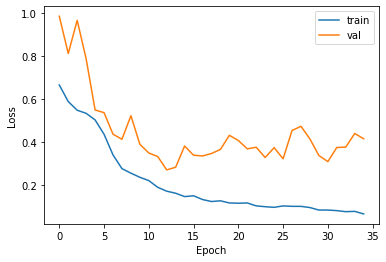

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

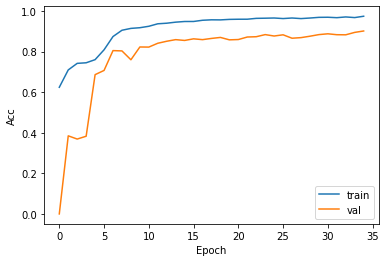

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
#print(np.unique(Y_pred))
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.97      0.92       149
     class 1       0.97      0.85      0.91       149

    accuracy                           0.91       298
   macro avg       0.92      0.91      0.91       298
weighted avg       0.92      0.91      0.91       298

